In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X = dataset.drop(labels=['CustomerId','Surname','RowNumber','Exited'],axis=1)

In [4]:
y = dataset['Exited']

In [5]:
label1 = LabelEncoder()
X['Geography']=label1.fit_transform(X['Geography'])

In [6]:
label2 = LabelEncoder()
X['Gender']=label1.fit_transform(X['Gender'])

In [7]:
X = pd.get_dummies(X, drop_first=True, columns=['Geography'])

In [8]:
X = pd.get_dummies(X, drop_first=True, columns=['Gender'])

## Feature standardization

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2, random_state=0, stratify=y)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Build DNN

In [11]:
model = Sequential()
model.add(Dense(128,activation='elu',kernel_initializer='he_normal',input_dim=X.shape[1]))
#1st hidden layer with 128 nodes & input layer with 11 nodes (11 features)
model.add(BatchNormalization()) # it is ok to use it with elu
model.add(Dropout(0.3)) # it is ok to use it with elu
model.add(Dense(32,activation='elu',kernel_initializer='he_normal'))  
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid')) #output layer, binary-classification

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
epochs=30

In [14]:
history=model.fit(X_train, y_train.to_numpy(), validation_data=(X_test,y_test.to_numpy()), batch_size=128, epochs=epochs, verbose=1)

Train on 8000 samples, validate on 2000 samples
Epoch 1/30
8000/8000 [==============================] - 3s 376us/sample - loss: 0.6931 - accuracy: 0.6351 - val_loss: 0.5884 - val_accuracy: 0.7040
Epoch 2/30
8000/8000 [==============================] - ETA: 0s - loss: 0.5509 - accuracy: 0.72 - 0s 57us/sample - loss: 0.5477 - accuracy: 0.7296 - val_loss: 0.4604 - val_accuracy: 0.8015
Epoch 3/30
8000/8000 [==============================] - 0s 53us/sample - loss: 0.4799 - accuracy: 0.7865 - val_loss: 0.4001 - val_accuracy: 0.8395
Epoch 4/30
8000/8000 [==============================] - 0s 50us/sample - loss: 0.4270 - accuracy: 0.8204 - val_loss: 0.3704 - val_accuracy: 0.8475
Epoch 5/30
8000/8000 [==============================] - 0s 49us/sample - loss: 0.4097 - accuracy: 0.8260 - val_loss: 0.3577 - val_accuracy: 0.8560
Epoch 6/30
8000/8000 [==============================] - 0s 54us/sample - loss: 0.3995 - accuracy: 0.8320 - val_loss: 0.3523 - val_accuracy: 0.8565
Epoch 7/30
8000/8000 [=====

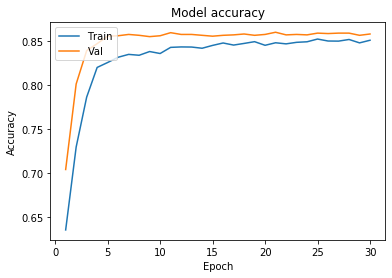

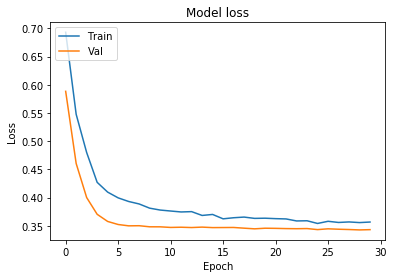

In [15]:
epoch_range=range(1,epochs+1)
plt.plot(epoch_range,history.history['accuracy'])
plt.plot(epoch_range,history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

## Evaluate

In [16]:
y_pred = model.predict_classes(X_test)

In [19]:
confusion_matrix(y_test, y_pred)

array([[1546,   47],
       [ 236,  171]], dtype=int64)

In [20]:
accuracy_score(y_test,y_pred)

0.8585